In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import os
import random as rd

In [25]:
# one kernel per coherence value and agent (6 kernels)
# for one agent
##plot agent kernel for all coherences ##
##plot joystick (both direction and eccentricity) reconstruction for test set (one example per coherence)
##plot reconstruction error vs coherence for several agents
##plot mean reconstruction error vs coherence +std over all agents 

In [14]:
LIST_COH = [0.0, 0.07999999821186066, 0.13199999928474426, 0.21780000627040863, 0.3594000041484833, 0.5929999947547913, 0.9783999919891357]

In [6]:

def load_kernel(agent,coherence,kernel_size=300,kernel_type='Basic'):
    #load kernel
    prefix_path = 'CPR_psychophysics/'+agent+'/Analysis/Kernels/'+kernel_type+'/'+str(int(coherence*1000))+'/'
    load_path = prefix_path+'train_and_save_kernel_size_'+str(kernel_size)+'.txt'
    kernel = np.loadtxt(load_path).view(complex)
    return kernel

#build the data set at fixed coherence and fixed agent it is list_block
def get_train_test_set(agent,coh):
    list_block = os.listdir('CPR_psychophysics/'+agent+'/Data/Formated_Data/Joystick/'+str(int(coh*1000)))
    train_set = list_block[:int(0.7*len(list_block))]
    test_set = list_block[int(0.7*len(list_block)):]
    return train_set, test_set   
    
    
def plot_kernels_agent(agent,kernel_size=300,kernel_type='Basic'):
    fig, ax = plt.subplots(2,3,constrained_layout=True,figsize=(10,8))
    x_label = r'$t$ (ms)'
    y_label = r'$|k(t)|$'
    for k in range(2):
        ax[k,0].set_ylabel(y_label)
    for l in range(3):
        ax[-1,l].set_xlabel(x_label)
    fig.suptitle('agent : '+agent)
    for num,coherence in enumerate(LIST_COH[1:]):
        k = num//3
        l = num%3
        kernel = load_kernel(agent,coherence,kernel_size=kernel_size,kernel_type=kernel_type)
        dt = 8.33; time_frame = [i*dt for i in range(len(kernel))]
        ax[k,l].plot(time_frame[1:-1],np.abs(kernel[1:-1]),'.')
        ax[k,l].set_title('Coherence = ' + str(np.round(coherence,4)))
    return None

        
def load_signal(agent,block,coh):
    path = 'CPR_psychophysics/'+agent+'/Data/Formated_Data/Signal/'+str(int(coh*1000))+'/'+str(block)
    return coh*np.loadtxt(path).view(complex)

                                                                        
def reconstructed_joystick(agent,block,coh,kernel,signal):
    tab = np.convolve(kernel,signal,mode='same')
    return np.angle(tab), np.abs(tab)                                                                        
                                                                        
list_coherence = [0.13199999928474426, 0.3594000041484833, 0.9783999919891357]
                                                                        
#we reconstruct the joystick on the test block
def plot_reconstructed_joystick(agent,list_coherence,test_blocks,kernel_size=300,kernel_type='Basic'):
    fig, ax = plt.subplots(3,len(list_coherence),constrained_layout=True,figsize=(10,8))
    x_label = r'$t$ (ms)'
    y_label1 = 'cosine Direction'
    y_label2 = 'sine Direction'
    y_label3 = 'Eccentricity'
    ax[0,0].set_ylabel(y_label1)
    ax[1,0].set_ylabel(y_label2)
    ax[2,0].set_ylabel(y_label3)
    for l in range(len(list_coherence)):
        ax[-1,l].set_xlabel(x_label)
    fig.suptitle('agent : '+agent)
    dt = 8.33
    for num,coh in enumerate(list_coherence):
        test_block = test_blocks[num]
        kernel = load_kernel(agent,coh,kernel_size=kernel_size,kernel_type=kernel_type)
        #load the complex average direction 
        signal = load_signal(agent,test_block,coh)
        rec_direction, rec_eccentricity = reconstructed_joystick(agent,test_block,coh,kernel,signal)
        time_frame, direction, eccentricity = load_agent_joystick(agent,test_block,coh)
        rec_time_frame = [i*dt+time_frame[0] for i in range(len(rec_direction))]
        ax[0,num].plot(rec_time_frame,np.cos(rec_direction),'.',label='reconstructed')
        ax[0,num].plot(time_frame,np.cos(direction),'.',label='original')
        ax[1,num].plot(rec_time_frame,np.sin(rec_direction),'.',label='reconstructed')
        ax[1,num].plot(time_frame,np.sin(direction),'.',label='original')
        ax[2,num].plot(rec_time_frame,rec_eccentricity,'.',label='reconstructed')
        ax[2,num].plot(time_frame,eccentricity*rec_eccentricity[0]/eccentricity[0],'.',label='original')
   
    for l in range(len(list_coherence)):
        ax[0,l].set_title('Coherence = ' + str(np.round(list_coherence[l],4)))
        for k in range(3):
            ax[k,l].legend()
def load_agent_joystick(agent,block,coh):
    path = 'CPR_psychophysics/'+agent+'/Data/Formated_Data/Joystick/'+str(int(coh*1000))+'/'+str(block)
    tab = np.loadtxt(path)
    return tab[:,0]*1e-3, tab[:,1]*np.pi/180, tab[:,2]
 


# Kernel per coherence for one agent

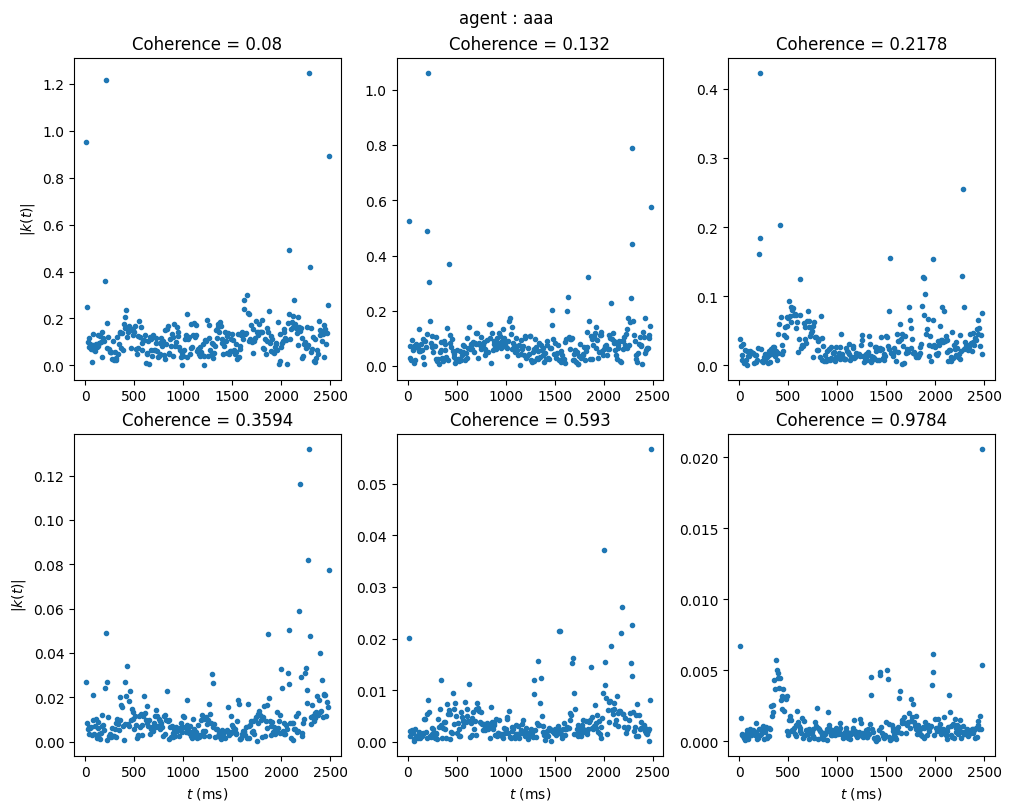

In [22]:
agent = 'aaa'
plot_kernels_agent(agent,kernel_type='Basic')

# Reconstructing Joystick from test set 

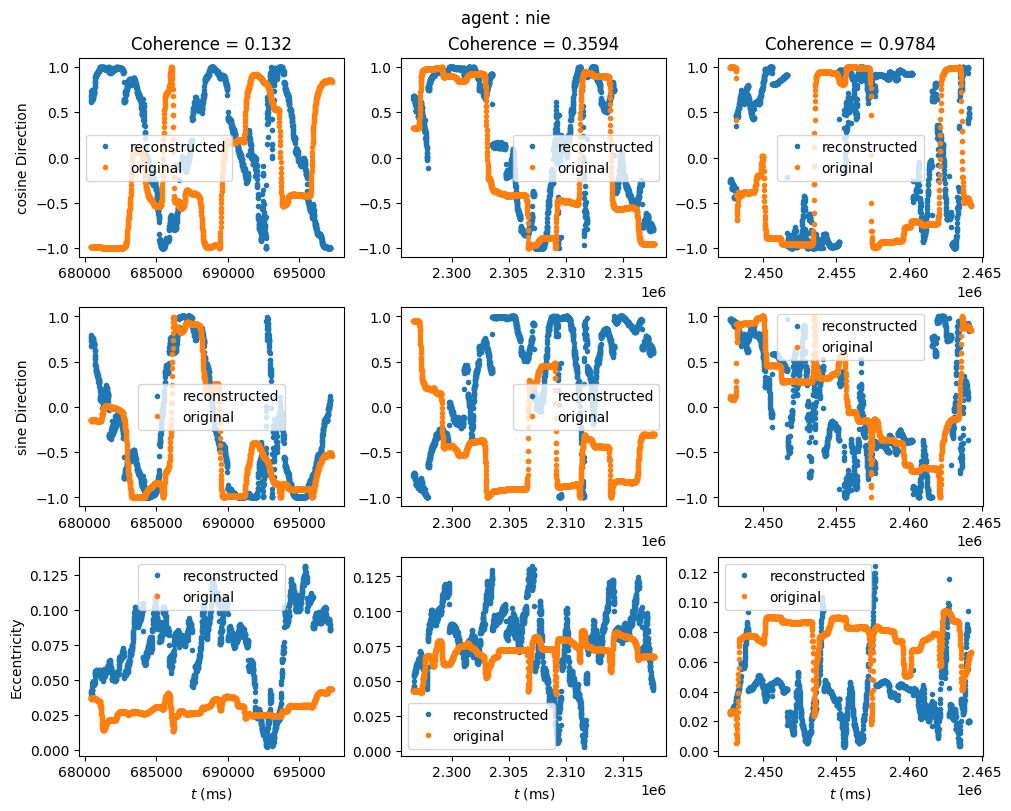

In [16]:
list_coherence = [0.13199999928474426, 0.3594000041484833, 0.9783999919891357]

test_blocks = []
for coh in list_coherence:
    train_set, test_set = get_train_test_set(agent,coh)
    test_blocks.append(test_set[0])#rd.choice(test_set))
plot_reconstructed_joystick(agent,list_coherence,test_blocks,kernel_size=300,kernel_type='Basic')

# Reconstructing Joystick from train set

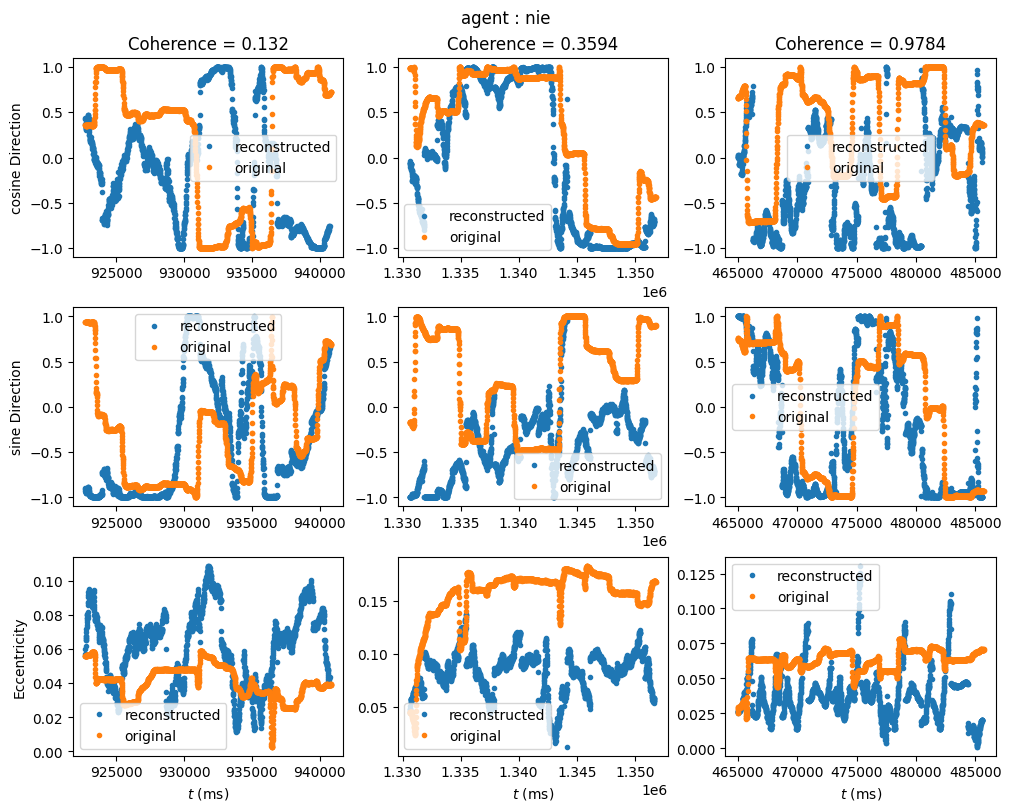

In [17]:
list_coherence = [0.13199999928474426, 0.3594000041484833, 0.9783999919891357]

test_blocks = []
for coh in list_coherence:
    train_set, test_set = get_train_test_set(agent,coh)
    test_blocks.append(train_set[0])#rd.choice(train_set))
plot_reconstructed_joystick(agent,list_coherence,test_blocks,kernel_size=300,kernel_type='Basic')

In [18]:
def reconstruction_error(agent):
    mean_dir_error = []
    mean_ecc_error = []
    std_dir_error = []
    std_ecc_error = []
    for coh in LIST_COH[1:]:
        dir_error = []
        ecc_error = []
        train_set, test_set = get_train_test_set(agent,coh)
        kernel = load_kernel(agent,coh)
        for block in test_set:
            orig_data = load_agent_joystick(agent,block,coh)
            signal = load_signal(agent,block,coh)
            rec_direction, rec_ecc = reconstructed_joystick(agent,block,coh,kernel,signal)
            dir_error.append(np.mean(np.abs(np.exp(1j*orig_data[1][:len(rec_direction)])-np.exp(1j*rec_direction))**2))
            ecc_error.append(np.mean(np.abs(orig_data[2][:len(rec_ecc)]-rec_ecc)**2))
        mean_dir_error.append(np.mean(dir_error))
        mean_ecc_error.append(np.mean(ecc_error))
        std_dir_error.append(np.std(dir_error))
        std_ecc_error.append(np.std(ecc_error))
    #### plot
    mean_dir_error = np.array(mean_dir_error)
    mean_ecc_error = np.array(mean_ecc_error)
    std_dir_error = np.array(std_dir_error)
    std_ecc_error = np.array(std_ecc_error)
    fig, ax = plt.subplots(constrained_layout = True)
    ax.plot(LIST_COH[1:],mean_dir_error,'.',label='direction')
    ax.fill_between(LIST_COH[1:],mean_dir_error-std_dir_error/2,mean_dir_error+std_dir_error/2,color='gray',alpha=0.5)
    ax.plot(LIST_COH[1:],mean_ecc_error,'*',label='eccentricity')
    ax.fill_between(LIST_COH[1:],mean_ecc_error-std_ecc_error/2,mean_ecc_error+std_ecc_error/2,color='gray',alpha=0.5)
    ax.set_xlabel('Coherence')
    ax.set_ylabel('Reconstruction error')
    ax.set_title(agent)
    ax.legend()

# Reconstruction error for the test set

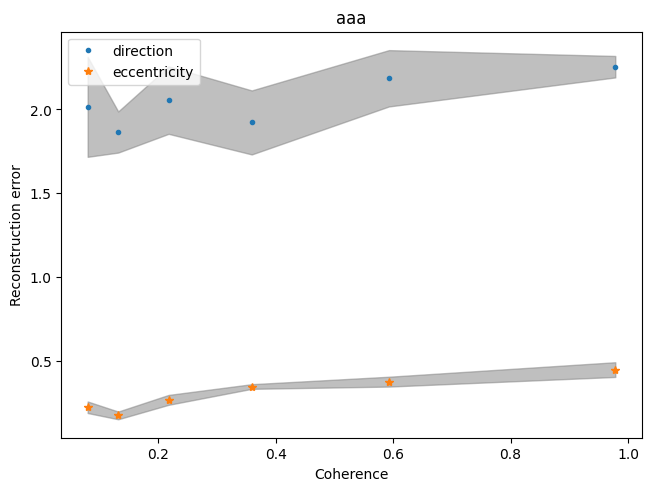

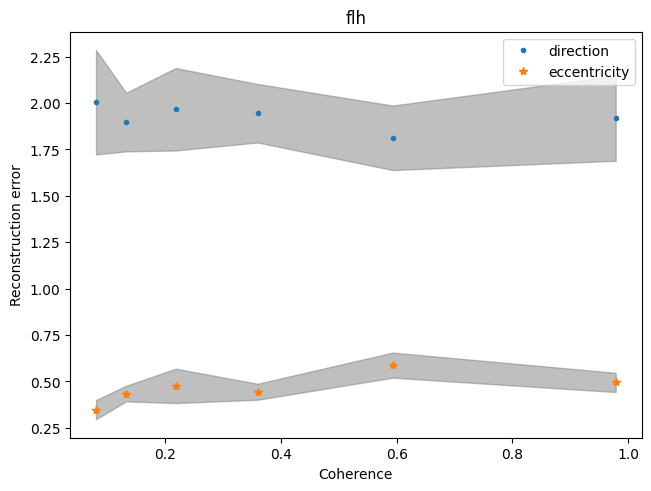

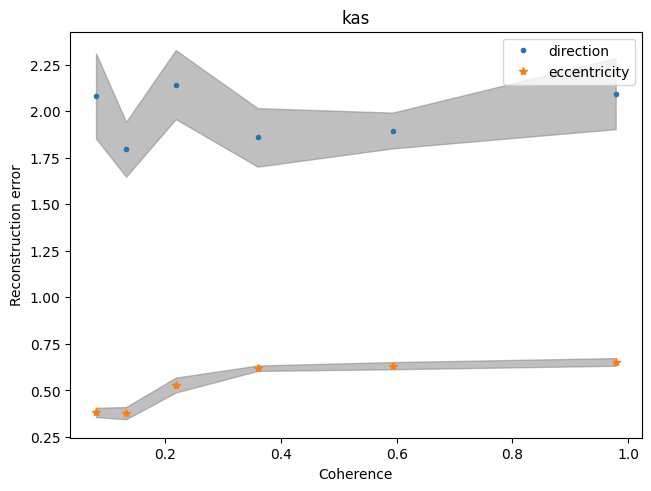

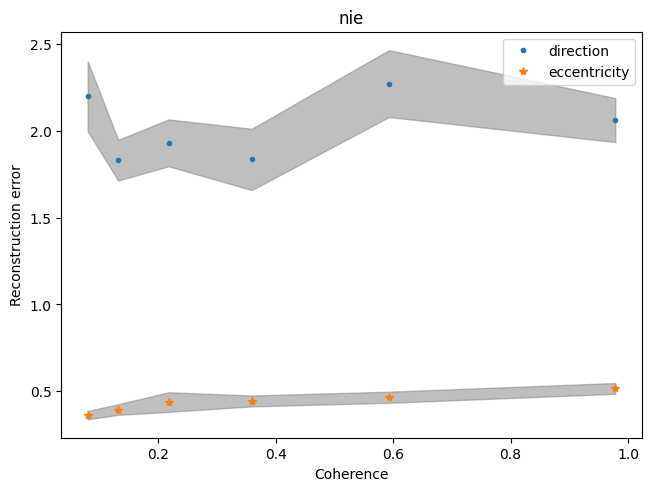

In [19]:
agents = ['aaa','flh','kas','nie']
for agent in agents:
     reconstruction_error(agent)

In [20]:
def reconstruction_error_train(agent):
    mean_dir_error = []
    mean_ecc_error = []
    std_dir_error = []
    std_ecc_error = []
    for coh in LIST_COH[1:]:
        dir_error = []
        ecc_error = []
        train_set, test_set = get_train_test_set(agent,coh)
        kernel = load_kernel(agent,coh)
        for block in train_set:
            orig_data = load_agent_joystick(agent,block,coh)
            signal = load_signal(agent,block,coh)
            rec_direction, rec_ecc = reconstructed_joystick(agent,block,coh,kernel,signal)
            dir_error.append(np.mean(np.abs(np.exp(1j*orig_data[1][:len(rec_direction)])-np.exp(1j*rec_direction))**2))
            ecc_error.append(np.mean(np.abs(orig_data[2][:len(rec_ecc)]-rec_ecc)**2))
        mean_dir_error.append(np.mean(dir_error))
        mean_ecc_error.append(np.mean(ecc_error))
        std_dir_error.append(np.std(dir_error))
        std_ecc_error.append(np.std(ecc_error))
    #### plot
    mean_dir_error = np.array(mean_dir_error)
    mean_ecc_error = np.array(mean_ecc_error)
    std_dir_error = np.array(std_dir_error)
    std_ecc_error = np.array(std_ecc_error)
    fig, ax = plt.subplots(constrained_layout = True)
    ax.plot(LIST_COH[1:],mean_dir_error,'.',label='direction')
    ax.fill_between(LIST_COH[1:],mean_dir_error-std_dir_error/2,mean_dir_error+std_dir_error/2,color='gray',alpha=0.5)
    ax.plot(LIST_COH[1:],mean_ecc_error,'*',label='eccentricity')
    ax.fill_between(LIST_COH[1:],mean_ecc_error-std_ecc_error/2,mean_ecc_error+std_ecc_error/2,color='gray',alpha=0.5)
    ax.set_xlabel('Coherence')
    ax.set_ylabel('Reconstruction error')
    ax.set_title(agent)
    ax.legend()

# Reconstruction error for the train set

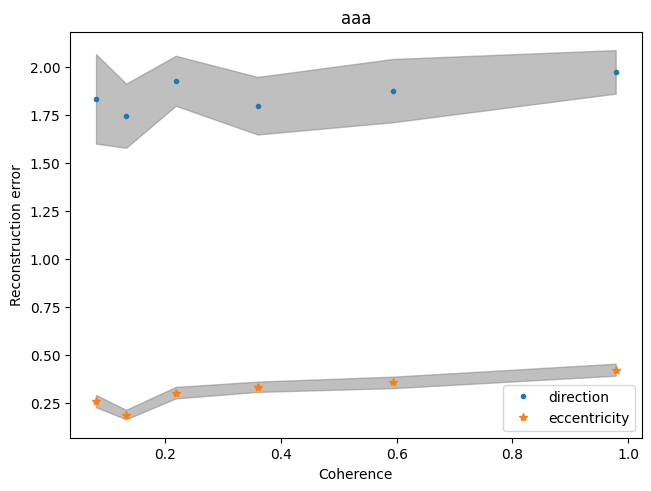

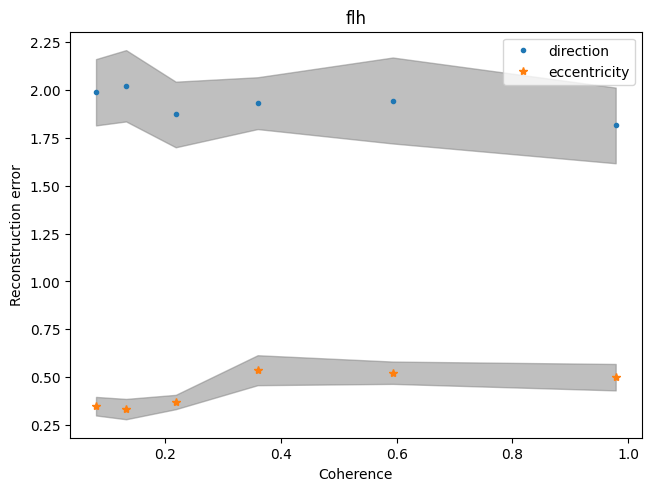

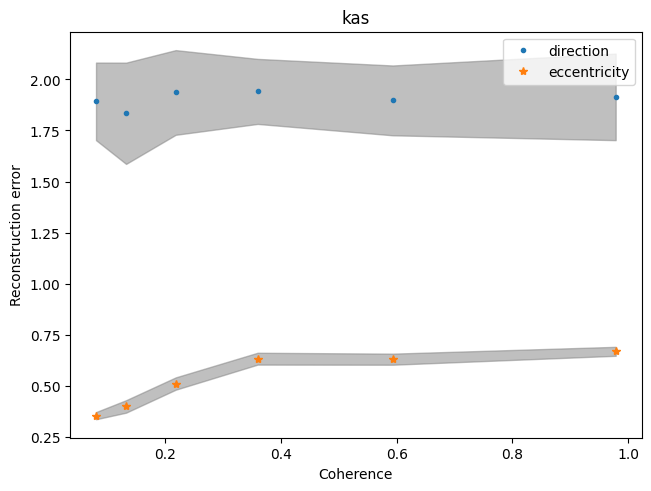

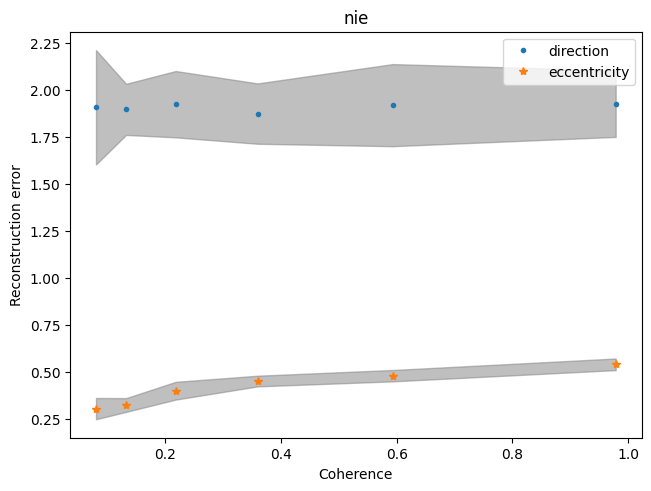

In [21]:
agents = ['aaa','flh','kas','nie']
for agent in agents:
     reconstruction_error_train(agent)